In [1]:
# importing all the necessary libraries required for the project.
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
data = pd.read_csv('world.csv',decimal=',')
print("Number of Missing Data in each Variable:\n",data.isnull().sum().describe);

Number of Missing Data in each Variable:
 <bound method NDFrame.describe of Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64>


In [3]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
data.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,NaN,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,1900.0,90.7,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [6]:
# Data Preparation Filling the Missing Values.

# 1. Let's find the region median for variables like "GDP ($ per capita)", "Literacy (%)", and Agriculture.
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [7]:
import warnings

warnings.filterwarnings("ignore")

In [8]:
# For feature climate I will use mode instead of median because it seems that climate is a categorical variable.

for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        # Group by region select column climate and apply mode on climate
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
        
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]


In [9]:
# Top 20 countries with the highest GDP ($ per capita)
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
top_gdp_countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,3.0,11.94,8.41,0.010,0.130,0.860
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,898.0,19.13,0.22,80.65,3.0,14.14,8.26,0.010,0.204,0.787
154,Norway,WESTERN EUROPE,4610820,323802,14.2,7.77,1.74,3.70,37800.0,100.0,461.7,2.87,0.00,97.13,3.0,11.46,9.40,0.021,0.415,0.564
22,Bermuda,NORTHERN AMERICA,65773,53,1241.0,194.34,2.49,8.53,36000.0,98.0,851.4,20.00,0.00,80.00,2.0,11.40,7.74,0.010,0.100,0.890
38,Cayman Islands,LATIN AMER. & CARIB,45436,262,173.4,61.07,18.75,8.19,35000.0,98.0,836.3,3.85,0.00,96.15,2.0,12.74,4.89,0.014,0.032,0.954
177,San Marino,WESTERN EUROPE,29251,61,479.5,0.00,10.98,5.73,34600.0,96.0,704.3,16.67,0.00,83.33,3.0,10.02,8.17,0.022,0.245,0.720
196,Switzerland,WESTERN EUROPE,7523934,41290,182.2,0.00,4.05,4.39,32700.0,99.0,680.9,10.42,0.61,88.97,3.0,9.71,8.49,0.015,0.340,0.645
54,Denmark,WESTERN EUROPE,5450661,43094,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,3.0,11.13,10.36,0.018,0.246,0.735
93,Iceland,WESTERN EUROPE,299388,103000,2.9,4.83,2.38,3.31,30900.0,99.9,647.7,0.07,0.00,99.93,3.0,13.64,6.72,0.086,0.150,0.765
12,Austria,WESTERN EUROPE,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678


In [10]:
# Calculating the average(mean) of feature "GDP ($ per capita)" across all the countries
# Creating a dataframe 
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
mean

,Country,GDP ($ per capita)
0,World mean,9673.568282


In [11]:
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
gdps

,Country,GDP ($ per capita)
0,Luxembourg,55100.000000
1,United States,37800.000000
2,Norway,37800.000000
3,Bermuda,36000.000000
4,Cayman Islands,35000.000000
5,San Marino,34600.000000
6,Switzerland,32700.000000
7,Denmark,31100.000000
8,Iceland,30900.000000
9,Austria,30000.000000


* Luxembourg has the highest GDP in the world.
* The next 19 countries are quite close to each other


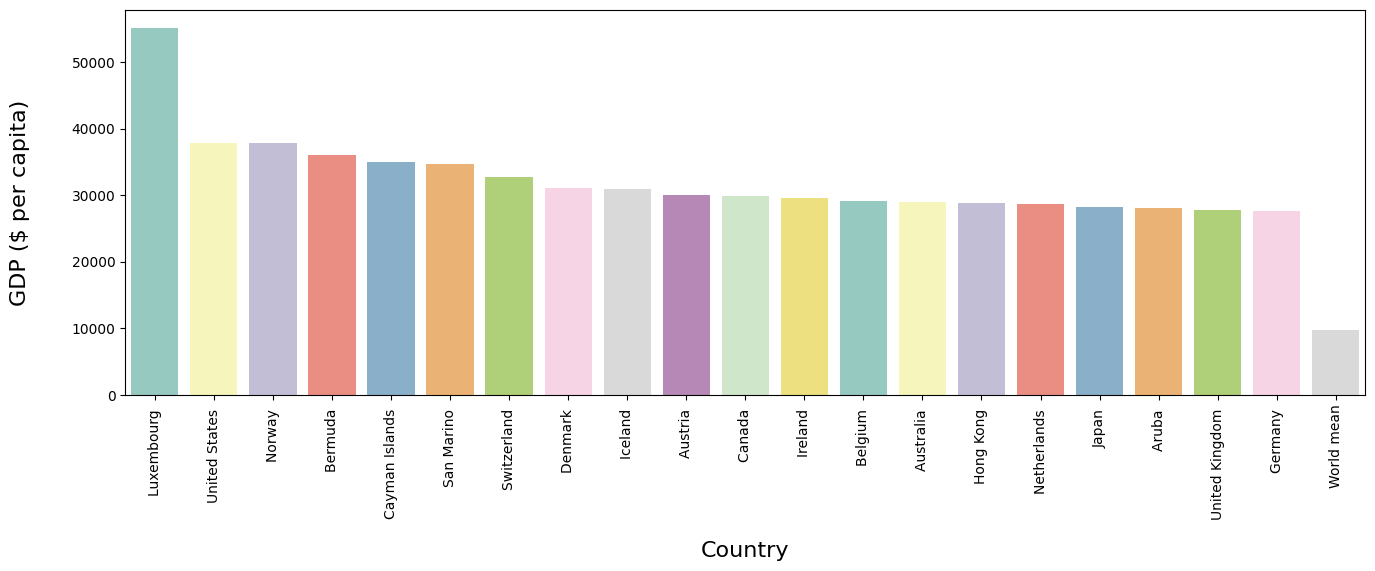

In [12]:
fig, ax = plt.subplots(figsize=(16,5))

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

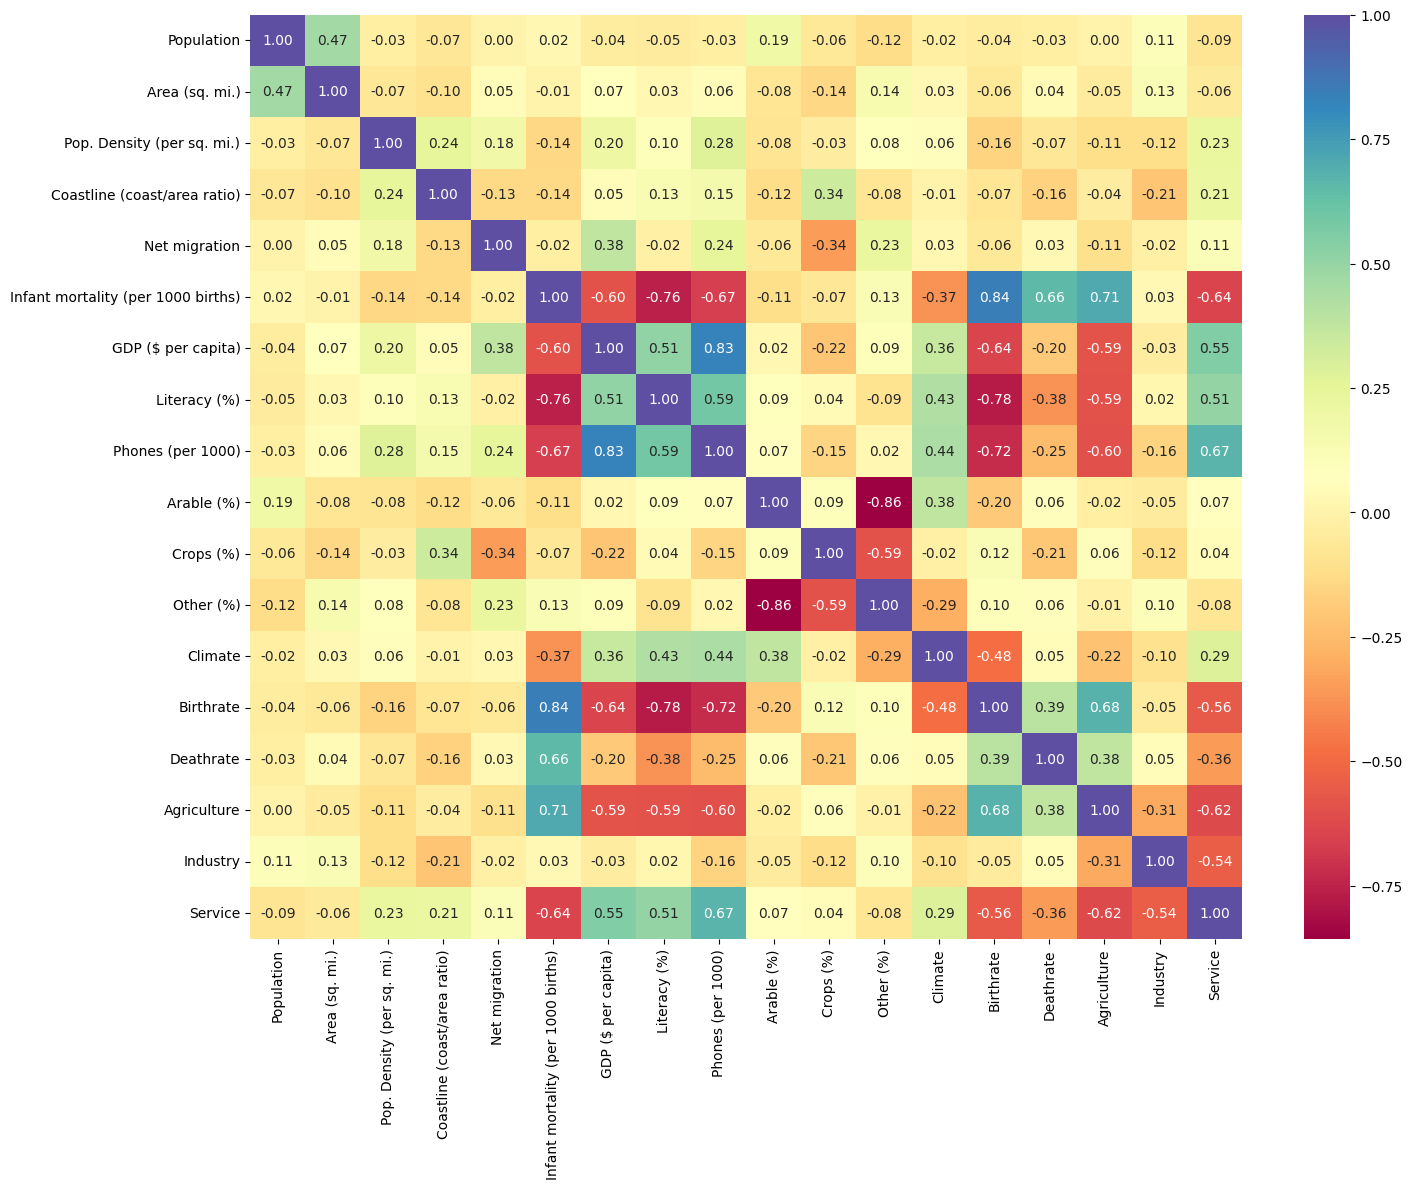

In [13]:
# To see correlation between all numerical columns
plt.figure(figsize = (16,12))
sns.heatmap(data = data.iloc[:, 2:].corr(), annot = True, fmt = '.2f', cmap = 'Spectral');

In [14]:
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col != 'GDP ($ per capita)') & (col != 'Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

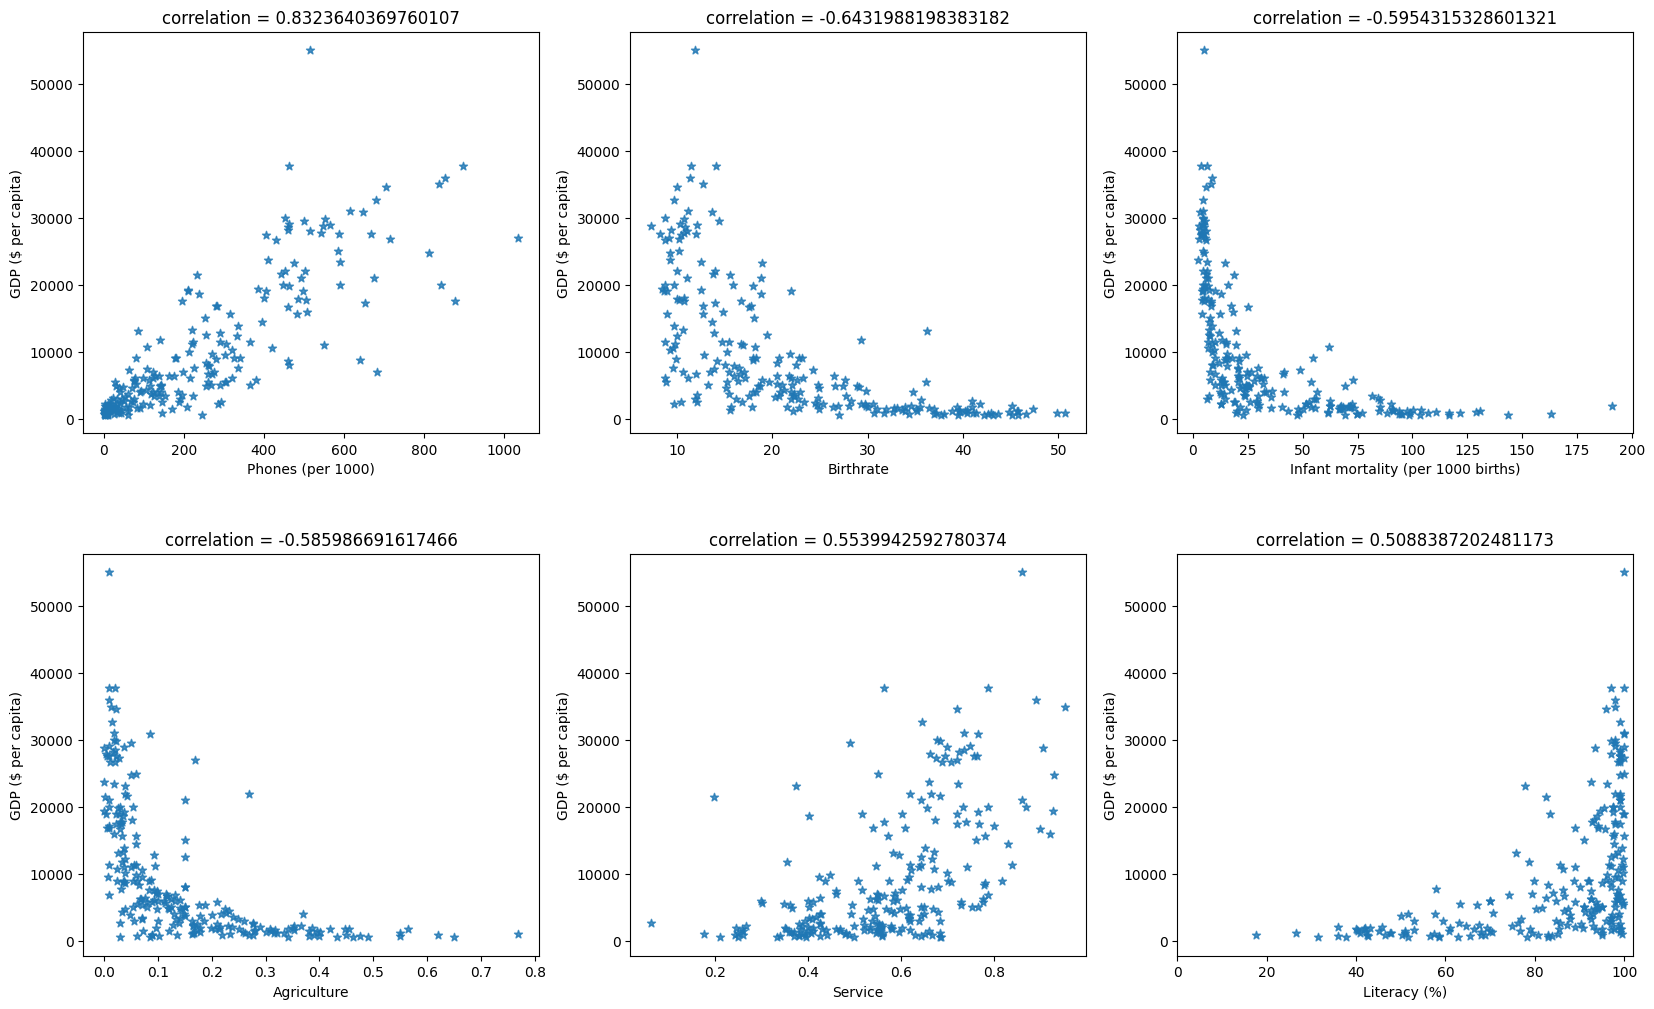

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.3)

for i in range(2):
    for j in range(3):
        sns.regplot(x = corr_to_gdp.index.values[i*3+j], y = 'GDP ($ per capita)', data = data,
                   ax = axes[i,j], fit_reg = False, marker = '*')
        title = 'correlation = ' + str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [16]:
# Countries with the Low Birth Rate and Low GDP per capita
data.loc[(data['Birthrate'] < 14) & (data['GDP ($ per capita)'] < 10000)]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4.0,9.95,14.65,0.054,0.371,0.575


In [17]:
# Modeling
# Training and Testing
# First I need to do the label encoding for the categorical features "Region" and "Climate".

data['Region_label'] = LabelEncoder().fit_transform(data['Region'])
data['Climate_label'] = LabelEncoder().fit_transform(data['Climate'])

data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4


In [18]:
# These all variables will be my training features
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']

In [19]:
# Splitting the data for Training and Testing
train, test = train_test_split(data, test_size = 0.3, shuffle = True)


In [20]:
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [21]:
# features = list(data.columns)
# features

In [22]:
# Linear Regression Model
Lr_model = LinearRegression()

In [23]:
# Fitting the Data into the Model
Lr_model.fit(train_X, train_Y)

LinearRegression()

In [24]:
train_pred_Y = Lr_model.predict(train_X)
test_pred_Y = Lr_model.predict(test_X)

In [25]:
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index = train_Y.index)
train_pred_Y

11     27005.200461
175     4449.900779
75      5568.188938
21       751.361257
179     8402.144266
           ...     
9       5825.803560
56      5037.016280
144     8398.890634
66     18925.999479
13      2862.425489
Length: 158, dtype: float64

In [26]:
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index = test_Y.index)
test_pred_Y

92     14674.363983
104    28144.600601
121    23076.758370
190    18720.051657
131    13447.900603
           ...     
124      851.625977
199        0.000000
192     3046.169482
63      2443.029731
212    18260.281515
Length: 69, dtype: float64

In [27]:
# Calculating the Root Mean Squarred Error & Mean Squarred Log Error train data
rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)

In [28]:
# Calculating the Root Mean Squarred Error & Mean Squarred Log Error for test data
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

In [29]:
print("Result of a Linear Regression Model: \n")
print('RMSE_train:',rmse_train,'\nMSLE_train:',msle_train, '\n')
print('RMSE_test:',rmse_test,'\nMSLE_test:',msle_test)

Result of a Linear Regression Model: 

RMSE_train: 4177.925034668988 
MSLE_train: 5.798481215578801 

RMSE_test: 6168.34907475596 
MSLE_test: 5.847836128764199


In [30]:
# Random Forest Model
Rf_model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)

In [31]:
Rf_model.fit(train_X, train_Y)

RandomForestRegressor(max_depth=6, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [32]:
train_pred_Y = Rf_model.predict(train_X)
test_pred_Y = Rf_model.predict(test_X)

In [33]:
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index = train_Y.index)
train_pred_Y

11     26664.443679
175     5032.762835
75      4020.837572
21      1287.191391
179     9535.665013
           ...     
9       4523.732234
56      5960.703363
144     6267.951915
66     22790.150666
13      4491.427062
Length: 158, dtype: float64

In [34]:
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index = test_Y.index)
test_pred_Y

92     11137.555089
104    24815.991730
121    27702.012837
190    21710.112660
131    16816.015174
           ...     
124     1346.383903
199     1914.983394
192     1496.548248
63      1826.654398
212    13791.797841
Length: 69, dtype: float64

In [35]:
RMSE_train_rf = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
MSLE_train_rf = mean_squared_log_error(train_pred_Y, train_Y)

In [36]:
RMSE_test_rf = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
MSLE_test_rf = mean_squared_log_error(test_pred_Y, test_Y)

In [37]:
print("Result of a Random Forest Model: \n")
print('RMSE_train:',RMSE_train_rf,'\nMSLE_train:',MSLE_train_rf, '\n')
print('RMSE_test:',RMSE_test_rf,'\nMSLE_test:',MSLE_test_rf)

Result of a Random Forest Model: 

RMSE_train: 2730.009812068906 
MSLE_train: 0.19022589536433962 

RMSE_test: 5067.38810880259 
MSLE_test: 0.22079678702583905


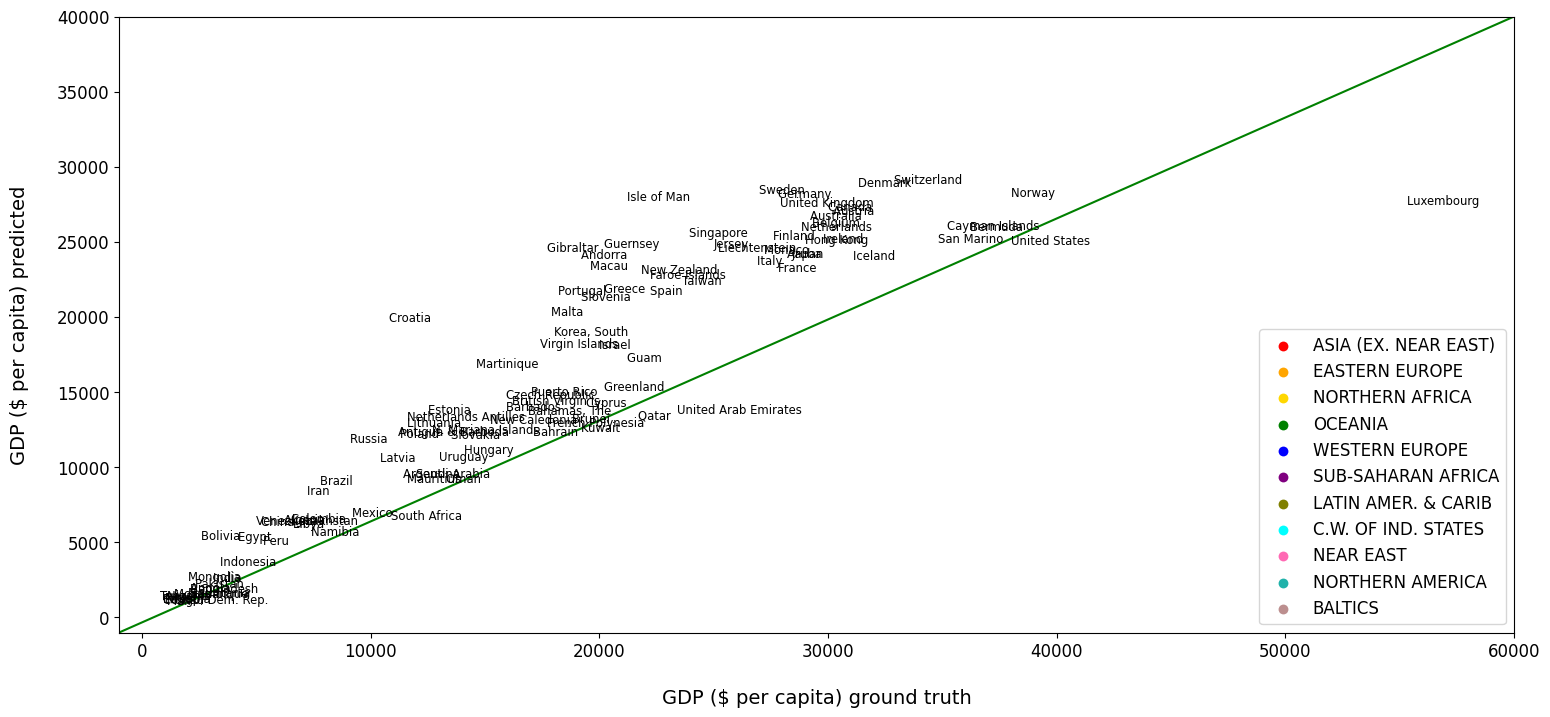

In [38]:
plt.figure(figsize=(18, 8))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = data.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)': 'red',
          'EASTERN EUROPE': 'orange',
          'NORTHERN AFRICA': 'gold',
          'OCEANIA': 'green',
          'WESTERN EUROPE': 'blue',
          'SUB-SAHARAN AFRICA': 'purple',
          'LATIN AMER. & CARIB': 'olive',
          'C.W. OF IND. STATES': 'cyan',
          'NEAR EAST': 'hotpink',
          'NORTHERN AMERICA': 'lightseagreen',
          'BALTICS': 'rosybrown'}

for region, color in colors.items():
    subset = data_shuffled[data_shuffled['Region'] == region]
    ax = plt.scatter(subset['GDP ($ per capita)'], subset['GDP ($ per capita)'], marker='.', color=color, s=200, linewidths=0, label=region)

plt.legend(loc=4, prop={'size': 12})
plt.xlabel('GDP ($ per capita) ground truth', labelpad=20, fontsize=14)
plt.ylabel('GDP ($ per capita) predicted', labelpad=20, fontsize=14)
plt.plot([-1000, 60000], [-1000, 40000], c='green')

plt.xlim(-1000, 60000)
plt.ylim(-1000, 40000)

for i in range(train_test_Y.shape[0]):
    if data_shuffled['Area (sq. mi.)'].iloc[i] > 8e5 or data_shuffled['Population'].iloc[i] > 1e8 or data_shuffled['GDP ($ per capita)'].iloc[i] > 10000:
        plt.text(train_test_Y.iloc[i] + 200, train_test_pred_Y.iloc[i] - 200, label.iloc[i], size='small')

plt.tick_params(labelsize=12)

plt.show()

In [39]:
# Creating a new feature Total_GDP ($)
data['Total_GDP ($)'] = data['GDP ($ per capita)'] * data['Population']

In [40]:
# Top 10 countries by GDP
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
top_gdp_countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label,Total_GDP ($)
214,United States,NORTHERN AMERICA,298444215,9631420,31.0,0.21,3.41,6.50,37800.0,97.0,...,80.65,3.0,14.14,8.26,0.010,0.204,0.787,7,4,1.128119e+13
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,...,83.35,1.5,13.25,6.97,0.125,0.473,0.403,0,1,6.569869e+12
103,Japan,ASIA (EX. NEAR EAST),127463611,377835,337.4,7.87,0.00,3.26,28200.0,99.0,...,86.85,3.0,9.37,9.16,0.017,0.258,0.725,0,4,3.594474e+12
94,India,ASIA (EX. NEAR EAST),1095351995,3287590,333.2,0.21,-0.07,56.29,2900.0,59.5,...,42.86,2.5,22.01,8.18,0.186,0.276,0.538,0,3,3.176521e+12
76,Germany,WESTERN EUROPE,82422299,357021,230.9,0.67,2.18,4.16,27600.0,99.0,...,65.56,3.0,8.25,10.62,0.009,0.296,0.695,10,4,2.274855e+12
69,France,WESTERN EUROPE,60876136,547030,111.3,0.63,0.66,4.26,27600.0,99.0,...,64.40,4.0,11.99,9.14,0.022,0.214,0.764,10,5,1.680181e+12
213,United Kingdom,WESTERN EUROPE,60609153,244820,247.6,5.08,2.19,5.16,27700.0,99.0,...,76.33,3.0,10.71,10.13,0.005,0.237,0.758,10,4,1.678874e+12
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,...,62.68,3.0,8.72,10.40,0.021,0.291,0.688,10,4,1.552165e+12
27,Brazil,LATIN AMER. & CARIB,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,...,92.15,2.0,16.56,6.17,0.084,0.400,0.516,4,2,1.429395e+12
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,...,92.56,4.0,9.95,14.65,0.054,0.371,0.575,2,5,1.271753e+12


In [41]:
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})

In [42]:
# Concatenating two variables "Country" and "Total_GDP ($)"
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)
gdps

,Country,Total_GDP ($)
0,United States,1.128119e+13
1,China,6.569869e+12
2,Japan,3.594474e+12
3,India,3.176521e+12
4,Germany,2.274855e+12
5,France,1.680181e+12
6,United Kingdom,1.678874e+12
7,Italy,1.552165e+12
8,Brazil,1.429395e+12
9,Russia,1.271753e+12


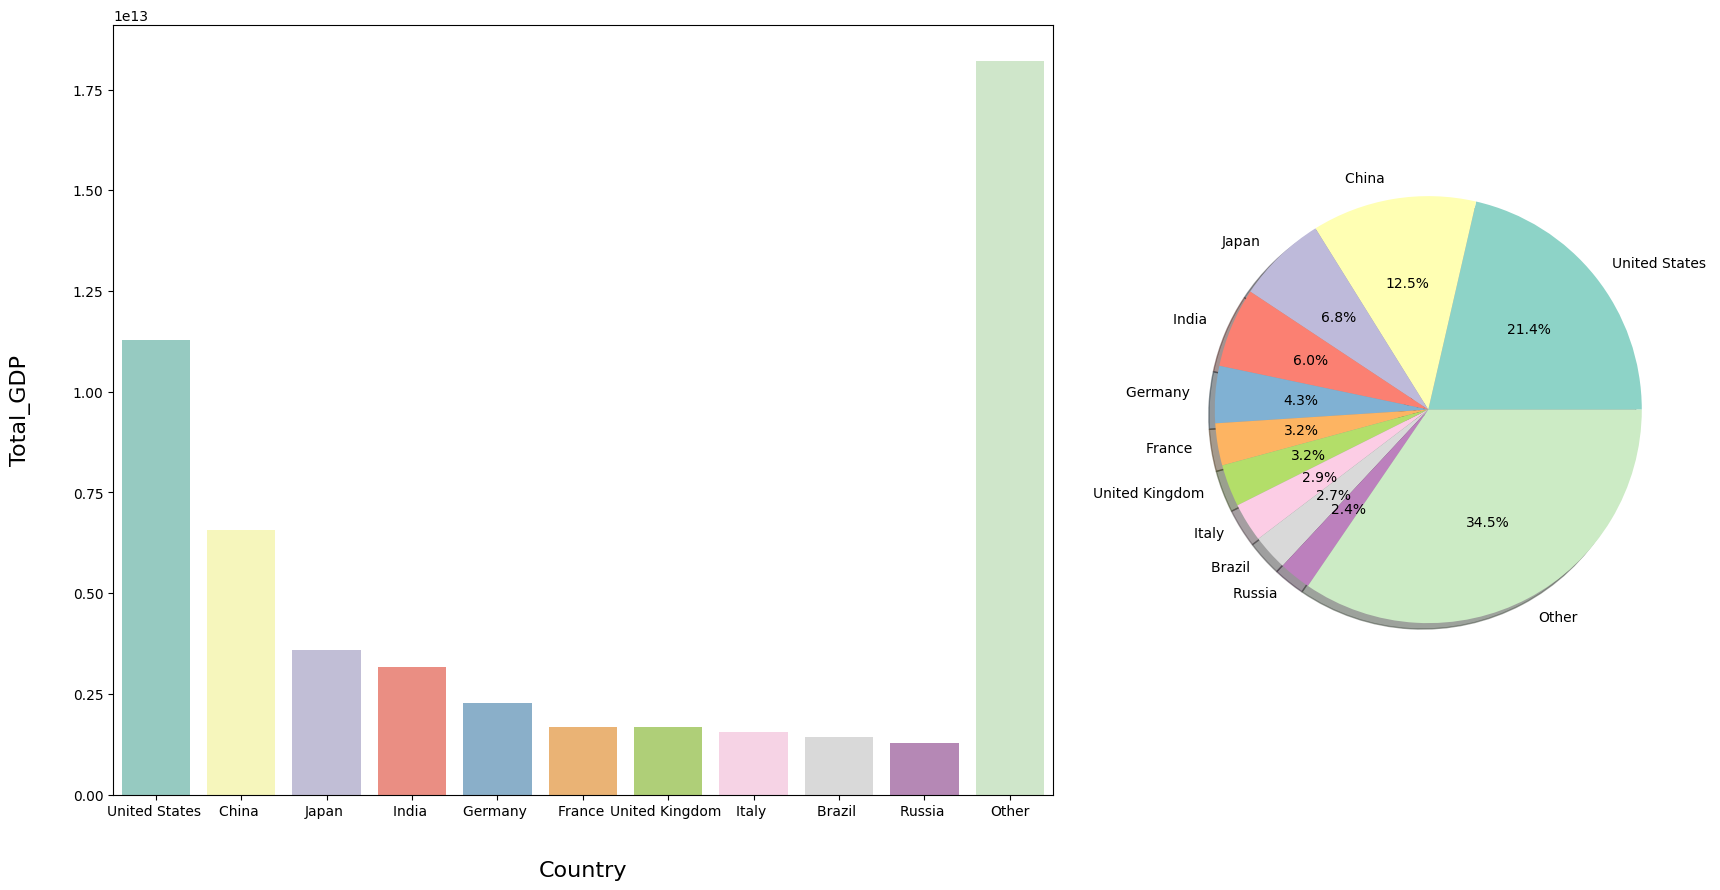

In [43]:
# Here are the top ten nations with the largest overall GDPs; their GDP accounts for almost two-thirds of global GDP.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10), gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country', y='Total_GDP ($)', data=gdps,ax=axes[0], palette='Set3')
axes[0].set_xlabel('Country',labelpad=30, fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30, fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

In [44]:
# Ranking countries by Total GDP ($)
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank1


,index,Country,Total_GDP ($)
0,214,United States,1.128119e+13
1,42,China,6.569869e+12
2,103,Japan,3.594474e+12
3,94,India,3.176521e+12
4,76,Germany,2.274855e+12
...,...,...,...
222,221,Wallis and Futuna,5.929250e+07
223,174,St Pierre & Miquelon,4.847940e+07
224,140,Montserrat,3.209260e+07
225,171,Saint Helena,1.875500e+07


In [45]:
# Ranking Countries by GDP ($ per capita)
Rank2 = data[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank2

,index,Country,GDP ($ per capita)
0,121,Luxembourg,55100.0
1,214,United States,37800.0
2,154,Norway,37800.0
3,22,Bermuda,36000.0
4,38,Cayman Islands,35000.0
...,...,...,...
222,33,Burundi,600.0
223,125,Malawi,600.0
224,58,East Timor,500.0
225,188,Somalia,500.0


In [46]:
# Converting both data frames into a pandas series
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)

In [47]:
# Countries with high total GDPs differ significantly from those with high average GDPs.
# When it comes to total GDP, China and India are well ahead.
# The United States is the only country in the top ten for both total and average GDP.
print('Rank of total GDP - Rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

Rank of total GDP - Rank of GDP per capita:


Country
United States        1
China              118
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

In [48]:
# I also investigate the relationship between total GDP and the other columns. 
# The top two factors are population and area.
#  which are followed by several other characteristics that have been proven to be largely connected with GDP per capita.
corr_total_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col != 'Total_GDP ($)') & (col != 'Climate') & (col != 'GDP ($ per capita)')):
        corr_total_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_total_gdp = corr_to_gdp.abs().sort_values(ascending = False)
corr_total_gdp = corr_total_gdp.loc[abs_corr_to_gdp.index]
print(corr_total_gdp)

Phones (per 1000)                     0.233484
Birthrate                            -0.166889
Infant mortality (per 1000 births)   -0.122076
Agriculture                          -0.139516
Service                               0.085096
Literacy (%)                          0.099417
Net migration                         0.054632
Crops (%)                            -0.077078
Deathrate                            -0.035820
Pop. Density (per sq. mi.)           -0.028487
Other (%)                            -0.064882
Area (sq. mi.)                        0.556396
Coastline (coast/area ratio)         -0.065211
Population                            0.639528
Industry                              0.050399
Arable (%)                            0.129928
dtype: float64


In [49]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]

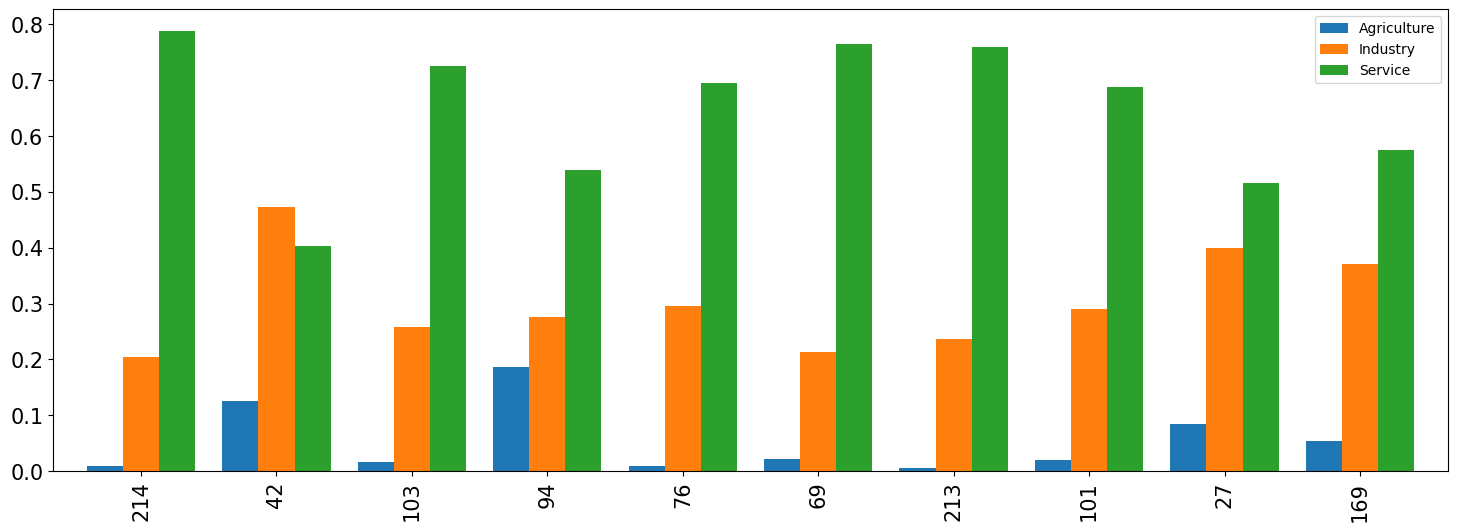

In [50]:
# Finally, let's compare the economic structures of the ten nations with the greatest overall GDP.
ax = plot_data.plot.bar(width = 0.8, fontsize = 15, figsize=(18,6))
ax.legend(bbox_to_anchor=(1, 1));

In [51]:
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')

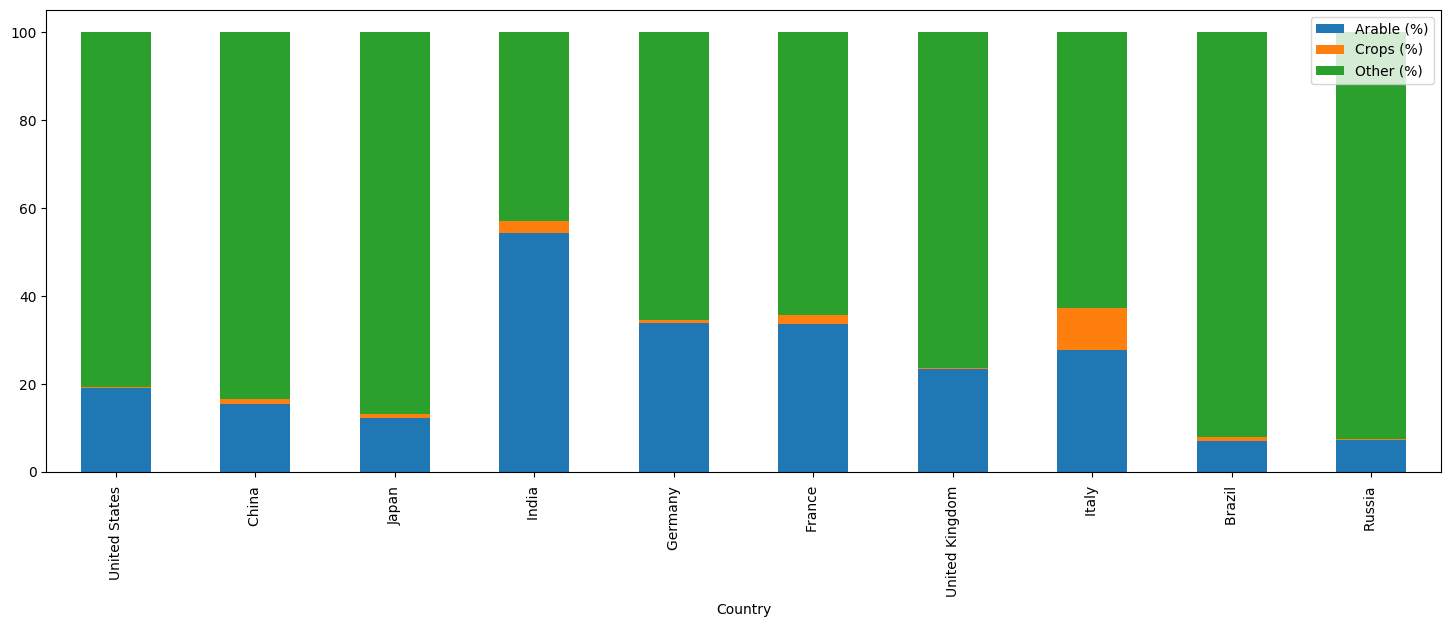

In [52]:
ax = plot_data.plot.bar(stacked = True,figsize=(18,6))
plt.show()